<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker*

## Notebook 4: Functions
###A bit more about packages
A package is a set of Python functions. When we want to use functions from a package, we need to import it. There are many different ways to import packages. The most basic syntax is

`import numpy`

After which any function in `numpy` can be called as `numpy.function()`. If you don't like the name of the package, for example because it is long, you can change the name. We have done this by renaming `numpy` to `np`, which is pretty standard in exploratory computing. After 

`import numpy as np`

all functions in `numpy` can be called as `np.function()`. 

Packages can also have subpackages. For example, the `numpy` package has a subpackage called `random`, which has a bunch of functions to deal with random variables. If the `numpy` package is imported with `import numpy as np`, functions in the `random` subpackage can be called as `np.random.function()`. 

If you only need one specific function, you don't have to import the entire package. For example, if you only want the cosine function of the numpy package, you may import it as `from numpy import cos`, after which you can simply call the cosine function as `cos()`. You can even rename functions when you import them. For example `from numpy import cos as newname` after which you can call the function `newname()` to compute the cosine. 

In the previous Notebooks we always imported `numpy` and called it `np` and we imported the plotting part of `matplotlib` and called it `plt`. Both are standard names in the Python community. The third statement we added is `%matplotlib inline`. This latter command is an IPython command and not a Python command. It will only work in IPython and is called a magic command. All magic commands are preceded with a `%`. The stament `%matplotlib inline` puts all figures in the Notebook rather than in separate windows. 

Enough about packages for now. Let's start the way we always start.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Functions
Functions are an essential part of a programming language.
You already used many functions like `plot` or `array`.
But you can also define your own functions.
To define a new function, use the `def` command. After `def` follows the name of the function and then between parentheses the arguments of the function and finally a colon. After the colon you indent until you are done with the function. The last line of the function should be `return` followed by what you want to return. For example, consider the following function of $x$:

$f(x)= \cos(x) \qquad x <0$

$f(x) = \exp(-x) \qquad x \ge 0$

Let's implement $f(x)$ in a function called `func`. There is one input argument: $z$. 

In [2]:
def func(x):
    if x < 0:
        f = np.cos(x)
    else:
        f = np.exp(-x)
    return f
print func(3)

0.0497870683679


Once you define a function in Python, you can call it whenever you want during the session. So we can call it again

In [3]:
print func(-2)

-0.416146836547


Note that once you have defined the function, typing 

`func(` and then hit [shift-tab]

and waiting a moment will provide you with the input arguments of the function in a little pop-up window. That is not very interesting for this case, as the input argument is only $x$, but is very helpful when there are multiple input arguments. You can also provide additional documentation of your function. Put the documentation at the top of the indented block and put it between triple quotes. Once you run the function below, it is defined, so in the code cell below you can type `func(` and [shift-tab] or `func?` and see the documentation you just provided

In [4]:
def func(x):
    '''First Python function
    written by Student X'''
    if x < 0:
        f = np.cos(x)
    else:
        f = np.exp(-x)
    return f

The names of the arguments of a function are the names used inside the function. They have no relationship to the names used outside the function. When using a variable as the argument of a function, only the *values* get passed to the function. In the example below, the *value* of `y` is passed as the first argument ot the function `func`. Inside the function, this value is used for the variable `x`.

In [5]:
y = 2
print 'func(2):',func(y)

func(2): 0.135335283237


###Exercise 1. <a name="back1"></a>First function
Write a Python function for the following function:

$f(x)=e^{-\alpha x}\cos(x)$

The function should take `x` and `alpha` as input arguments and return the function value. Give your function a unique name (if you also call it `func` it will overwrite the `func` function that we defined above). Make a plot of `f` vs. `x` for `x` going from 0 to $10\pi$ using two different values of `alpha`: 0.1 and 0.2. Add a legend and label the axes.

<a href="#ex1answer">Answer to Exercise 1</a>

###Keyword arguments
Functions may have multiple input arguments followed by keyword arguments. Arguments *must* be entered and must be entered in the order defined. Keyword arguments don't need to be entered. When they are not entered, the default value is used. Keyword arguments may be given in any order as long as they come after the regular arguments. If you specify the keyword arguments in the order they are defined in the argument list, you don't even need to preceed them with the keyword, but it is saver to write the keywords out and it makes your code easier to read. For example, the function $f(x)=A\cos(\pi x+\theta)$ can be written with keyword arguments for $A$ and $\theta$ as follows.

In [6]:
def testfunc(x, A=1, theta=0):
    return A * np.cos(np.pi*x+theta)
print testfunc(1)  # Uses default A=1, theta=0: cos(pi)
print testfunc(1, A=2)  # Now A=2, and theta is still 0: 2*cos(pi)
print testfunc(1, A=2, theta=np.pi/4)  # Now A=2, theta=pi/4: 2*cos(5pi/4) 
print testfunc(1, theta=np.pi / 4, A=2)  # Same as above: 2*cos(5pi/4)
print testfunc(1, theta=np.pi / 4)  # Now theta=pi/4, and A is still 1: cos(5pi/4)

-1.0
-2.0
-1.41421356237
-1.41421356237
-0.707106781187


###Local variables
Variables declared inside a function can only be used inside that function. The outside of a function doesn't know about the variables used inside the function, except for the variables that are returned by the function. In the code below, remove the `#` before `print a` and you will get an error message, as `a` is a local variable inside function `localtest` only (then put the `#` back, else you cannot run your entire Notebook anymore with the Cell $\to$ Run All menu command).

In [7]:
def localtest(x):
    a = 3
    b = 5
    return a*x + b
print localtest(4)
# print a  # Will cause an error, as 'a' is not known outside function 

17


###Three types of variables inside a function
There are actually three types of variables inside a function. We already learned about two of them: variables passed to the function through the argument list, like `x` in the function above, and local variables, like `a` and `b` in the function above. The third type are variables defined outside the function but not passed to the function through the argument list. When a variable is used inside a Python function, Python first checks whether the variable has been defined locally. If not, it checkes whether the variable is passed to the function through the argument list. And if that is not the case, Python checks whether the variable is defined outside the function, from the place the function was called. If that is not the case either, it will throw an error message. It is considered good coding practice to pass variables to a function when they are needed inside a function, rather than counting on Python to *find* the variable outside the function; it will likely lead to fewer coding errors as well.

Note that when a variable is declared locally, Python will not check whether that variable is also declared outside the function. It will happily create a new variable with the same name inside the function. It is important to realize the difference between these different types, so let's do a few examples.

In [8]:
# This function works properly
def test1(x):
    a = 3
    b = 5
    return a*x + b
print test1(4)

# This function also works, but it is sloppy coding
# since variable a is defined outside the function
a = 3
def test2(x):
    b = 5
    return a*x + b
print test2(4)  

17
17


In the following function, we define variable `var1` outside the function `test3`. The function `test3` doesn't take any input arguments (but it still needs the parentheses, else Python doesn't know it is a function!), and it creates a local variable `var1`. This local `var1` variable is only known inside the function `test3` and doesn't effect the value of `var1` outside function `test3`.

In [9]:
var1 = 8
def test3():
    var1 = 4
    print 'Goodmorning, var1 equals', var1
test3()
print 'value of var1 outside test3:', var1

Goodmorning, var1 equals 4
value of var1 outside test3: 8


###Functions are building blocks that need to be tested separately
Functions are the building blocks of a computer code. They represent a well defined functionality, which means they can *and should* be tested separately. So make it a habit to test whether your function does what you intended it to do. Sometimes it is easy to test a function: you can compare the value to a hand calculation, for example. Other times it is more difficult, and you need to write some additional code to test the function. It is always worthwhile to do that. If you test your functions well, it will aid you in debugging your code, because you know that the error is not inside the function.

###Exercise 2, <a name="back2"></a>Stream function for flow around a cylinder
Consider two-dimensional inviscid fluid flow (potential flow) around a cylinder.
The origin of the coordinate system is at the center of the cylinder.
The stream function is a function that is constant along stream lines. 
The stream function $\psi$ is a function of polar coordinates $r$ and $\theta$. The stream function is constant and equal to zero on the cylinder and doesn't really exist inside the cylinder, so let's make it zero there, like it is on the cylinder.

$\begin{split}
\psi &= 0 \qquad r\le R \\
\psi &= U(r-R^2/r)\sin(\theta) \qquad r\ge R
\end{split}$

where $U$ is the flow in the $x$-direction, $r$ is the radial distance from the center of the cylinder, $\theta$ is the angle, and $R$ is the radius of the cylinder. You may recall it is not always easy to compute the correct angle when given a value of $x$ and $y$, as the regular arctan function returns a value between $-\pi/2$ and $+\pi/2$ (radians), while if $x=-2$ and $y=2$, the angle should be $3\pi/4$.
`numpy` has a very cool function to compute the correct angle between $-\pi$ and $+\pi$ given the $x$ and $y$ coordinates. The function is `arctan2(y,x)`. Note that the function takes as its *first* argument `y` and as its *second* argument `x`.  

Write a function that computes the stream function for flow around a cylinder. The function should take two arguments, `x` and `y`, and two keyword arguments, `U` and `R`, and should return the stream function value. If you write the function correctly, it should give `psi(2, 4, U=1.0, R=1.0) = 3.8`, and `psi(0.5, 0, U=1.0, R=1.0) = 0` (inside the cylinder).

<a href="#ex2answer">Answer to Exercise 2</a>

###Vectorization of a function
Not all functions can be called with an array of values as input argument. For example, the function `func` defined at the beginning of this notebook doesn't work with an array of `x` values. Remove the `#` and try it out. Then put the `#` back

In [10]:
def func(x):
    if x < 0:
        f = np.cos(x)
    else:
        f = np.exp(-x)
    return f
x = np.linspace(-6, 6, 100)
#y = func(x) # Run this line after removing the # to see the error that occurs. Then put the # back

The reason this doesn't work is that Python doesn't know what to do with the line 

`if x < 0` 

when `x` contains many values. Hence the error message 

`The truth value of an array with more than one element is ambiguous` 

For some values of `x` the `if` statement may be `True`, for others it may be `False`. A simple way around this problem is to vectorize the function. That means we create a new function, let's call it `funcvec`, that is a vectorized form of `func` and can be called with an array as an argument (this is by far the easiest but not necessarily the computationally fastest way to make sure a function can be called with an array as an argument)

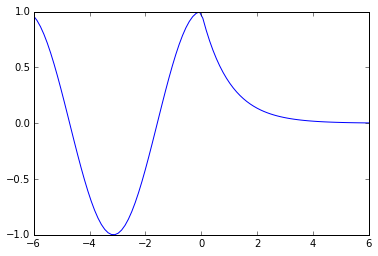

In [11]:
funcvec = np.vectorize(func)
x = np.linspace(-6, 6, 100)
y = funcvec(x)
plt.plot(x, y);

Back now to the problem of flow around a clinder. Contours of the stream function represent stream lines around the cylinder. To make a contour plot, the function to be contoured needs to be evaluated on a grid of points. The grid of points and an array with the values of the stream function at these points can be passed to a contouring routine to create a contour plot. To create a grid of points, use the function `meshgrid` which takes as input a range of `x` values and a range of `y` values, and returns a grid of `x` values and a grid of `y` values. For example, to have 5 points in x-direction from -1 to +1, and 3 points in y-direction from 0 to 10:

In [12]:
x,y = np.meshgrid( np.linspace(-1,1,5), np.linspace(0,10,3) ) 
print 'x values'
print x
print 'y values'
print y

x values
[[-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]]
y values
[[  0.   0.   0.   0.   0.]
 [  5.   5.   5.   5.   5.]
 [ 10.  10.  10.  10.  10.]]


###Exercise 3, <a name="back3"></a>Contour plot for flow around a cylinder
Evaluate the function for the stream function around a cylinder with radius 1.0 on a grid of 100 by 100 points, where `x` varies from -3 to +3, and `y` varies from -2 to 2. Evaluate the stream function on the entire grid (you need to create a vectorized version of the function you wrote to compute the stream function). Then use the `np.contour` function to create a contour plot (find out how by typing `np.contour?` or go to the matplotlib gallery, e.g., [this demo](http://matplotlib.org/examples/pylab_examples/contour_demo.html)). You need to use the command `plt.axis('equal')`, so that the scales along the axes are equal and the circle looks like a circle rather than an ellipse. Finally, you may want to add a nice circular patch using the `fill` command and specifying a bunch of $x$ and $y$ values around the circumference of the cylinder.

<a href="#ex3answer">Answer to Exercise 3</a>

###Return multiple *things*
An assignment can assign values to multiple variables in one statement using the following syntax

In [13]:
a, b = 4, 3
print 'a:', a
print 'b:', b
a, b, c = 27, np.arange(4), 'hello'
print 'a:', a
print 'b:', b
print 'c:', c
d, e, f = np.arange(0, 11, 5)
print 'd:', d
print 'e:', e
print 'f:', f

a: 4
b: 3
a: 27
b: [0 1 2 3]
c: hello
d: 0
e: 5
f: 10


Similarly, a function may return one value or one array, or multiple values, multiple arrays, or whatever the programmer decides to return (including nothing, of course). When multiple *things* are returned, they are returned as a tuple. They can be stored as a tuple, or, if the user knows how many *things* are returned, they can be stored in individual variables right away (you alredy used this syntax with the `meshgrid` function)

In [14]:
def newfunc():
    dump = 4 * np.ones(5)
    dump[0] = 100
    return 33, dump, 'this works great!'
test = newfunc()
print type(test)
print test[1] 
a,b,c = newfunc()
print 'a:', a
print 'b:', b
print 'c:', c

<type 'tuple'>
[ 100.    4.    4.    4.    4.]
a: 33
b: [ 100.    4.    4.    4.    4.]
c: this works great!


###Exercise 4, <a name="back4"></a>Streamplot of flow around a cylinder
The radial and tangential components of the velocity vector $\vec{v}=(v_r,v_\theta)$ for inviscid fluid flow around a cylinder are given by

$\begin{split}
v_r&=U(1-R^2/r^2)\cos(\theta) \qquad r\ge R \\
v_\theta&=-U(1+R^2/r^2)\sin(\theta) \qquad r\ge R
\end{split}$

and is zero otherwise. The $x$ and $y$ components of the velocity vector may be obtained from the radial and tangential components as

$\begin{split}
v_x&=v_r\cos(\theta) - v_\theta\sin(\theta) \\
v_y &= v_r\sin(\theta) + v_\theta\cos(\theta) 
\end{split}$

Write a function that returns the $x$ and $y$ components of the velocity vector for fluid flow around a cylinder. 
Test your function by making sure that at $(x,y)=(2,3)$ the velocity vector is $(v_x,v_y)=(1.0296,-0.0710)$.
Compute the $x$ and $y$ components of the velocity vector (vectorization won't help here, as your function returns two values, so you need a double loop) on a grid of 50 by 50 points where `x` varies from -3 to +3, and `y` varies from -2 to 2. Use $U=1$ and $R=1$. Create a stream plot using the cool function `streamplot`, which takes four arguments: `x`, `y`, `vx`, `vy` (use `np.streamplot?`).

<a href="#ex4answer">Answer to Exercise 4</a>

###Exercise 5, <a name="back5"></a>Derivative of a function
The function `func`, which we wrote earlier in this notebook, implements the following function

$f(x)= \cos(x) \qquad x <0$

$f(x) = \exp(-x) \qquad x \ge 0$

Derive an analytic expression (by hand) for the first derivative of $f(x)$ and implement it in a Python function. Test your function by comparing its output to a numerical derivative using a central difference scheme 

$\frac{\text{d}f}{\text{d}x}\approx \frac{f(x+d)-f(x-d)}{2d}$

where $d$ is a small number. Test your function for both $x<0$ and $x>0$.

<a href="#ex5answer">Answer to Exercise 5</a>

###Using a function as the argument of another function
So far, we have used single values or arrays as input arguments of functions. But we can also use a function as one of the input arguments of another function. Consider, for example, a function called `takesquare` that takes two input arguments: a function `finput` and a value `x`, and it returns the function `finput` evaluated at `x` and then squared.

In [15]:
def takesquare(finput, x):
    return finput(x) ** 2

We can now call `takesquare` with any function $f$ that can be called as $f(x)$ and returns one value. For example, we can call it with the cosine function, and we can test right away whether we got the right answer

In [16]:
print 'takesquare result:', takesquare(np.cos, 2)
print 'correct value is: ', np.cos(2) ** 2

takesquare result: 0.173178189568
correct value is:  0.173178189568


###Finding the zero of a function
Finding the zero of a function is a common task in exploratory computing. The value where the function equals zero is also called the *root* and finding the zero is referred to as *root finding*. There exist a number of methods to find the zero of a function varying from robust but slow (so it always finds a zero but it takes quite a few function evaluations) to fast but not so robust (it can find the zero very fast, but it won't always find it). Here we'll use the latter one.

Consider the function $f(x)=0.5-\text{e}^{-x}$. The function is zero when $x=-\ln(0.5)$, but let's pretend we don't know that and try to find it using a root finding method. First, we need to write a Python function for $f(x)$.

In [17]:
def f(x):
    return 0.5 - np.exp(-x)

We will use the method `fsolve` to find the zero of a function. `fsolve` is part of the `scipy.optimize` package. `fsolve` takes two arguments: the function for which we want to find the zero, and a starting value for the search (not surpisingly, the closer the starting value is to the root, the higher the chance that `fsolve` will find it).

In [18]:
from scipy.optimize import fsolve
xzero = fsolve(f,1)
print 'result of fsolve:', xzero
print 'f(x) at xzero:   ', f(xzero)
print 'exact value of xzero:', -np.log(0.5)



result of fsolve: [ 0.69314718]
f(x) at xzero:    [ 0.]
exact value of xzero: 0.69314718056


What now if you want to find the value of $x$ for which $f(x)=0.3$ (I know, it is $-\ln(0.2)$). We could, of course, create a new function $f_2=f(x)-0.3$ and then try to find the zero of $f_2$. But if we do that, we might as well make it more generic. Let's try to find $f(x)=a$, so we create a function $f_2=f(x)-a$

In [19]:
def f2(x, a=0):
    return f(x) - a

When we use `fsolve` to find the zero of function `f2`, we need to pass it an additional argument: the value of `a`. This can be done using the keyword argument `args`, which is a tuple of additional arguments passed to the function for which `fsolve` tries to find the root. `args` can be multiple values, as long as they are separated by commas.

In [20]:
xroot = fsolve(f2, 1, args=(0.3))
print 'fsolve result:', xroot
print 'f(xroot):     ', f(xroot)
print 'exact value:  ', -np.log(0.2)

fsolve result: [ 1.60943791]
f(xroot):      [ 0.3]
exact value:   1.60943791243


###Exercise <a name="back6"></a>6
The cumulative density distribution $F(x)$ of the Normal distribution is given by

$F(x)=\frac{1}{2}\left[ 1 + \text{erf}\left(\frac{x-\mu}{\sqrt{2\sigma^2}}\right)\right] $

where $\mu$ is the mean, $\sigma$ is the standard deviation, and erf is the error function. 
Recall the definition of a cumulative density distribution: When a random variable has a Normal distribution with mean $\mu$ and standard deviation $\sigma$, $F(x)$ is the probability that the random variable is less than $x$. Write a Python function for $F(x)$. The fist input argument should be $x$, followed by keyword arguments for $\mu$ and $\sigma$. The error function can be imported as

`from scipy.special import erf`

Test your function, for example by making sure that when $x=\mu$, $F$ should return 0.5, and when $x=\mu+1.96\sigma$, $F$ should return 0.975 (remember that from your statistics class?).

Next, find the value of $x$ for which $F(x)=p$, where $p$ is a probablity of interest (so it is between 0 and 1).
Check you answer for $\mu=3$, $\sigma=2$, and find $x$ for $p=0.1$ and $p=0.9$. Substitute the roots you determine with `fsolve` back into $F(x)$ to make sure your code works properly.

<a href="#ex6answer">Answer to Exercise 6</a>

###Sliders with IPython Widgets
IPython has a set of widgets that can be added to IPython Notebooks. Here, we learn how to apply a slider widget. First we write (or import) a function that we want the slider to work on. As an example, let's plot a line and specify the angle.

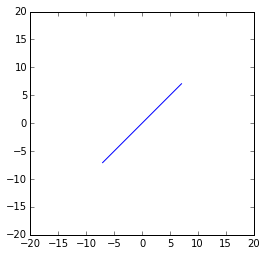

In [21]:
def plot_line(alpha=0):
    L = 10
    x = L * np.cos(np.deg2rad(alpha))
    y = L * np.sin(np.deg2rad(alpha))
    plt.plot([-x, x], [-y, y])
    plt.axis('scaled')
    plt.xlim(-20, 20)
    plt.ylim(-20, 20)
plot_line(45)

An interactive slider can be created with the `interact` function, which is part of the `IPython.html.widgets` package. The first argument of the `interact` function is the method that `interact` should call (in this case `plot_line`), and as a keyword argument, the angle `alpha` is used, which is the first argument of the `plot_line` method. The value of `alpha` is defined as a tuple, which are the minimum and maximum values of the slider. Note that you can move the slider to select different angles between the specified min and max values of -180$^\circ$ and +180$^\circ$, respectively. The slider sets integer values of the radius by default. Also note the grey X in the upper right hand corner. When the X is clicked, the slider disappears.

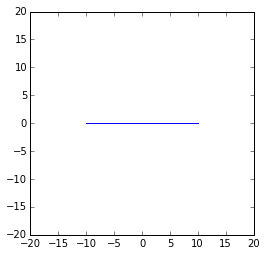

In [22]:
from IPython.html.widgets import interact
interact(plot_line, alpha=(-180,180)); 

The values of the slider may be changed into floats by making sure that at least one of the min/max values is a float. A step may also be defined by adding a third number to the tuple. For example, `alpha=(-180,180,5)` allows the slider to change the angle from -180 to 180 with steps of 5.

Multiple sliders may be added by specifying multiple keywords. For example, the length of the line may be changed in addition to the angle by creating a function that takes both the angle and the length of the line as input arguments and then use the `interact` command with two keyword arguments. Note that a the size of the figure is specified with the `plt.figure` command and the `figsize` keyword argument, which specifies the size of the figure in inches.

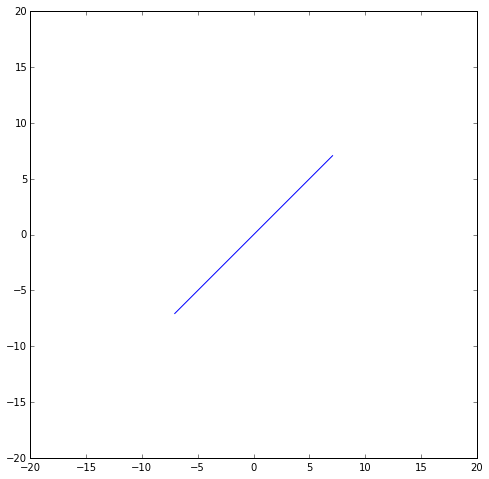

In [23]:
def plot_line(alpha=0, L=10):
    plt.figure(figsize=(8,8))
    x = L * np.cos(np.deg2rad(alpha))
    y = L * np.sin(np.deg2rad(alpha))
    plt.plot([-x, x], [-y, y])
    plt.axis('scaled')
    plt.xlim(-20, 20)
    plt.ylim(-20, 20)
plot_line(45)

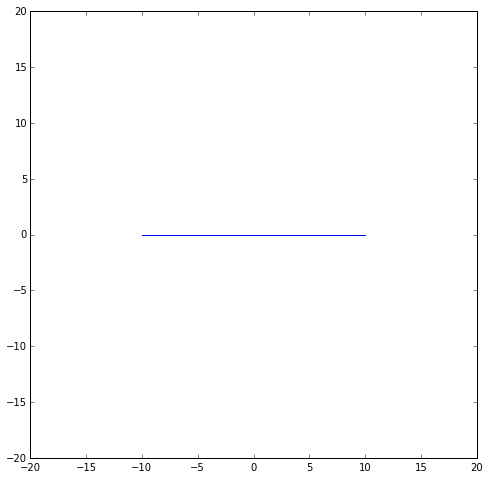

In [24]:
interact(plot_line, alpha=(-180,180,5), L=(5,20)); 

###Answers to the exercises

<a name="ex1answer">Answer to Exercise 1</a>

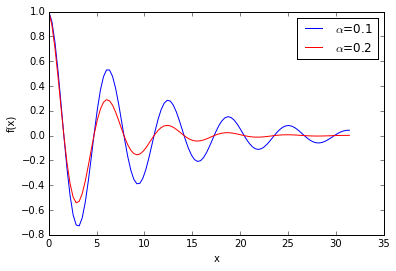

In [25]:
def test(x, alpha):
    return np.exp(-alpha * x) * np.cos(x)
x = np.linspace(0, 10*np.pi, 100)
y1 = test(x, 0.1)  # This function can be called with an array
y2 = test(x, 0.2)
plt.plot(x, y1,'b', label=r'$\alpha$=0.1') # if you specify a label, it will automatically be used in the legend
plt.plot(x, y2,'r', label=r'$\alpha$=0.2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

 <a href="#back1">Back to Exercise 1</a>

<a name="ex2answer">Answer to Exercise 2</a>

In [26]:
def psi(x, y, U=1.0, R=1.0):
    r = np.sqrt(x**2 + y**2)
    if r < R:
        rv = 0.0
    else:
        theta = np.arctan2(y, x)
        rv = U * (r - R**2 / r) * np.sin(theta)
    return rv

print psi(2, 4, U=1.0, R=1.0)
print psi(0.5, 0, U=1.0, R=1.0)

3.8
0.0


<a href="#back2">Back to Exercise 2</a>

<a name="ex3answer">Answer to Exercise 3</a>

(-3.0, 3.0, -2.0, 2.0)

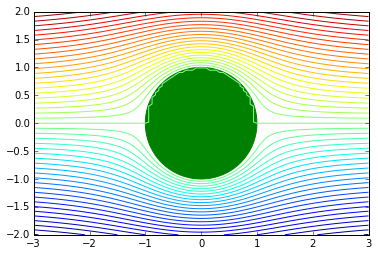

In [27]:
x,y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-2, 2, 100))
psivec = np.vectorize(psi)
p = psivec(x, y, R=1.0, U=1.0)
plt.contour(x, y, p, 50)
alpha = np.linspace(0, 2 * np.pi, 100)
plt.fill(np.cos(alpha), np.sin(alpha), ec='g', fc='g')
plt.axis('equal')

 <a href="#back3">Back to Exercise 3</a>

<a name="ex4answer">Answer to Exercise 4</a>

velocity at (2,3):  (1.029585798816568, -0.071005917159763177)


(-2, 2)

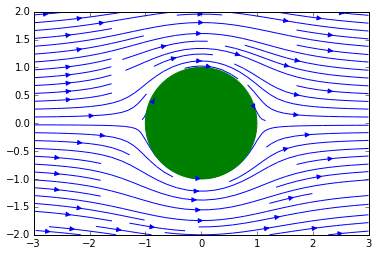

In [28]:
def velocity(x, y, U=1.0, R=1.0):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    if r > R:
        vr =  U * (1 - R**2 / r**2) * np.cos(theta)
        vt = -U * (1 + R**2 / r**2) * np.sin(theta)
        vx = vr * np.cos(theta) - vt * np.sin(theta)
        vy = vr * np.sin(theta) + vt * np.cos(theta)
    else:
        vx,vy = 0.0,0.0
    return vx,vy
print 'velocity at (2,3): ',velocity(2, 3)
x,y = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-2, 2, 50))
vx, vy = np.zeros((50, 50)), np.zeros((50, 50))
for i in range(50):
    for j in range(50):
        vx[i,j], vy[i,j] = velocity(x[i,j], y[i,j])
alpha = np.linspace(0, 2 * np.pi, 100)
plt.fill(np.cos(alpha), np.sin(alpha), ec='g', fc='g')
plt.streamplot(x, y, vx, vy)
plt.axis('equal')
plt.xlim(-3, 3)
plt.ylim(-2, 2)

 <a href="#back4">Back to Exercise 4</a>

<a name="ex5answer">Answer to Exercise 5</a>

In [29]:
def dfuncdx(x):
    if x < 0:
        rv = -np.sin(x)
    else:
        rv = -np.exp(-x)
    return rv
d = 1e-6
x = -1
dfdx = (func(x+d) - func(x-d)) / (2*d)
print 'True value   ', dfuncdx(x)
print 'Approx value ', dfdx
x = 1
dfdx = (func(x+d) - func(x-d)) / (2*d)
print 'True value   ', dfuncdx(x)
print 'Approx value ', dfdx

True value    0.841470984808
Approx value  0.84147098478
True value    -0.367879441171
Approx value  -0.36787944116


 <a href="#back5">Back to Exercise 5</a>

<a name="ex6answer">Answer to Exercise 6</a>

In [30]:
from scipy.special import erf
def F(x, mu=0, sigma=1, p=0):
    rv = 0.5 * (1.0 + erf((x - mu) / np.sqrt(2 * sigma**2)))
    return rv - p
print 'x=mu gives F(x)=', F(2, mu=2, sigma=1)
print 'x=mu+1.96sig gives:', F(2+1.96, mu=2, sigma=1)
x1 = fsolve(F, 3, args=(3, 2, 0.1))
x2 = fsolve(F, 3, args=(3, 2, 0.9))
print 'x1,F(x1):', x1, F(x1, mu=3, sigma=2)
print 'x2,F(x2):', x2, F(x2, mu=3, sigma=2)

x=mu gives F(x)= 0.5
x=mu+1.96sig gives: 0.975002104852
x1,F(x1): [ 0.43689687] [ 0.1]
x2,F(x2): [ 5.56310313] [ 0.9]


<a href="#back6">Back to Exercise 6</a>